Importing all the libraries I may need in the project : adding gradually

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json
from IPython.display import Image
from datetime import datetime

Importing the twitter_archives csv file "downloaded manually" and turn it to dataframe

In [2]:
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

check that it work right

In [3]:
twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Download the image predictions file programmatically from udacity server by the link provided

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
response = requests.get(url)

In [7]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

extract the name of the file from the link...

In [8]:
file_name = url.split('/')[-1]

In [9]:
file_name

'image-predictions.tsv'

create a file and write the content in it...

In [10]:
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)


read image_predictions and check that it works

In [11]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# I have problems with creating twitter api account , and I don not have more time to wait. so I will proceed with the ready file 
# I will practise it soon

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


open the file and read it line by line to create dataframe ,, the code from .... https://nfpdiscussions.udacity.com/t/concering-reading-twitter-jason-txt-file/41138

In [14]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df_now = pd.DataFrame(df_list)
api_df_now


,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


In [15]:
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


# Assessing

now, all the three dataframe has been collected. twitter_archives has 2356 tweet_id, image_predictions has 2075 tweet_id, and api_df_now has 2354 tweet_id 
the next step is to assess them all to solve some of the quality and tidiness issues and to descover which is the best way to deal with them for analizing

at first i will look at them on spreed sheet like excel

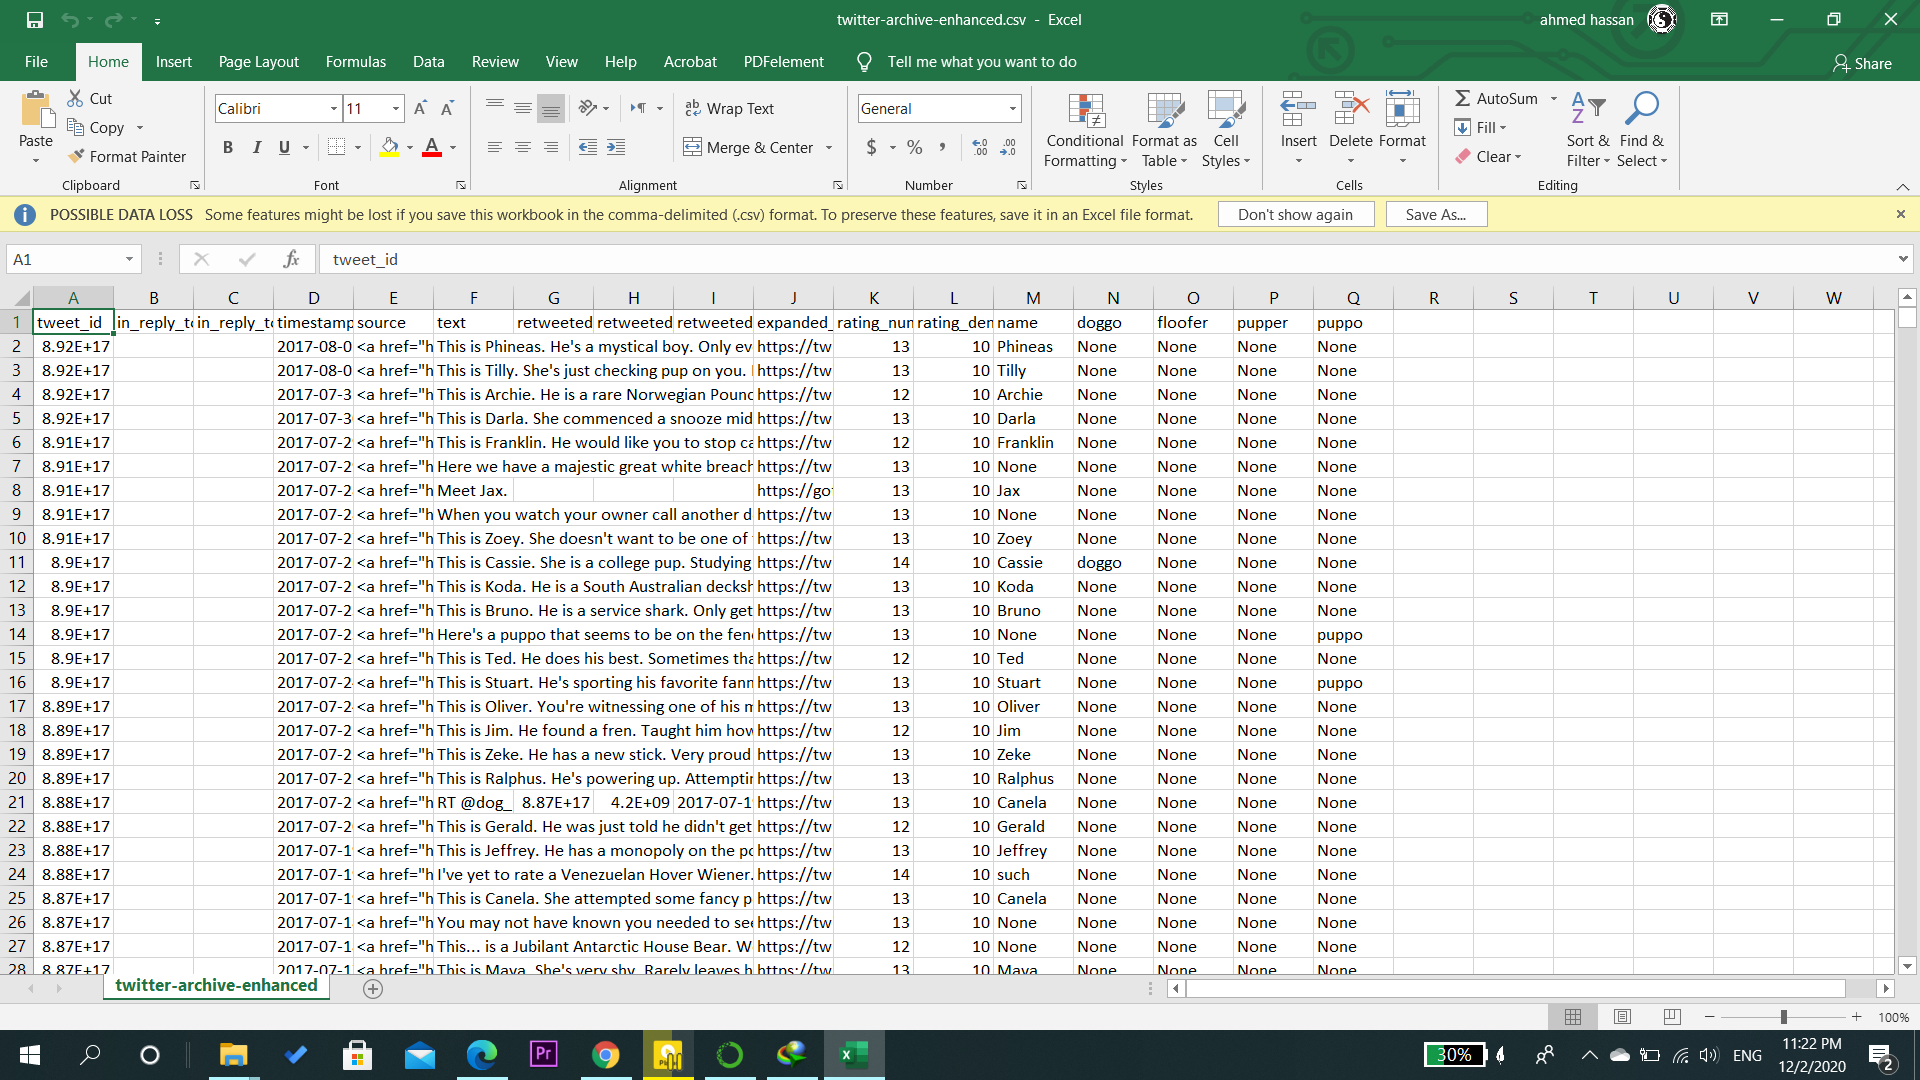

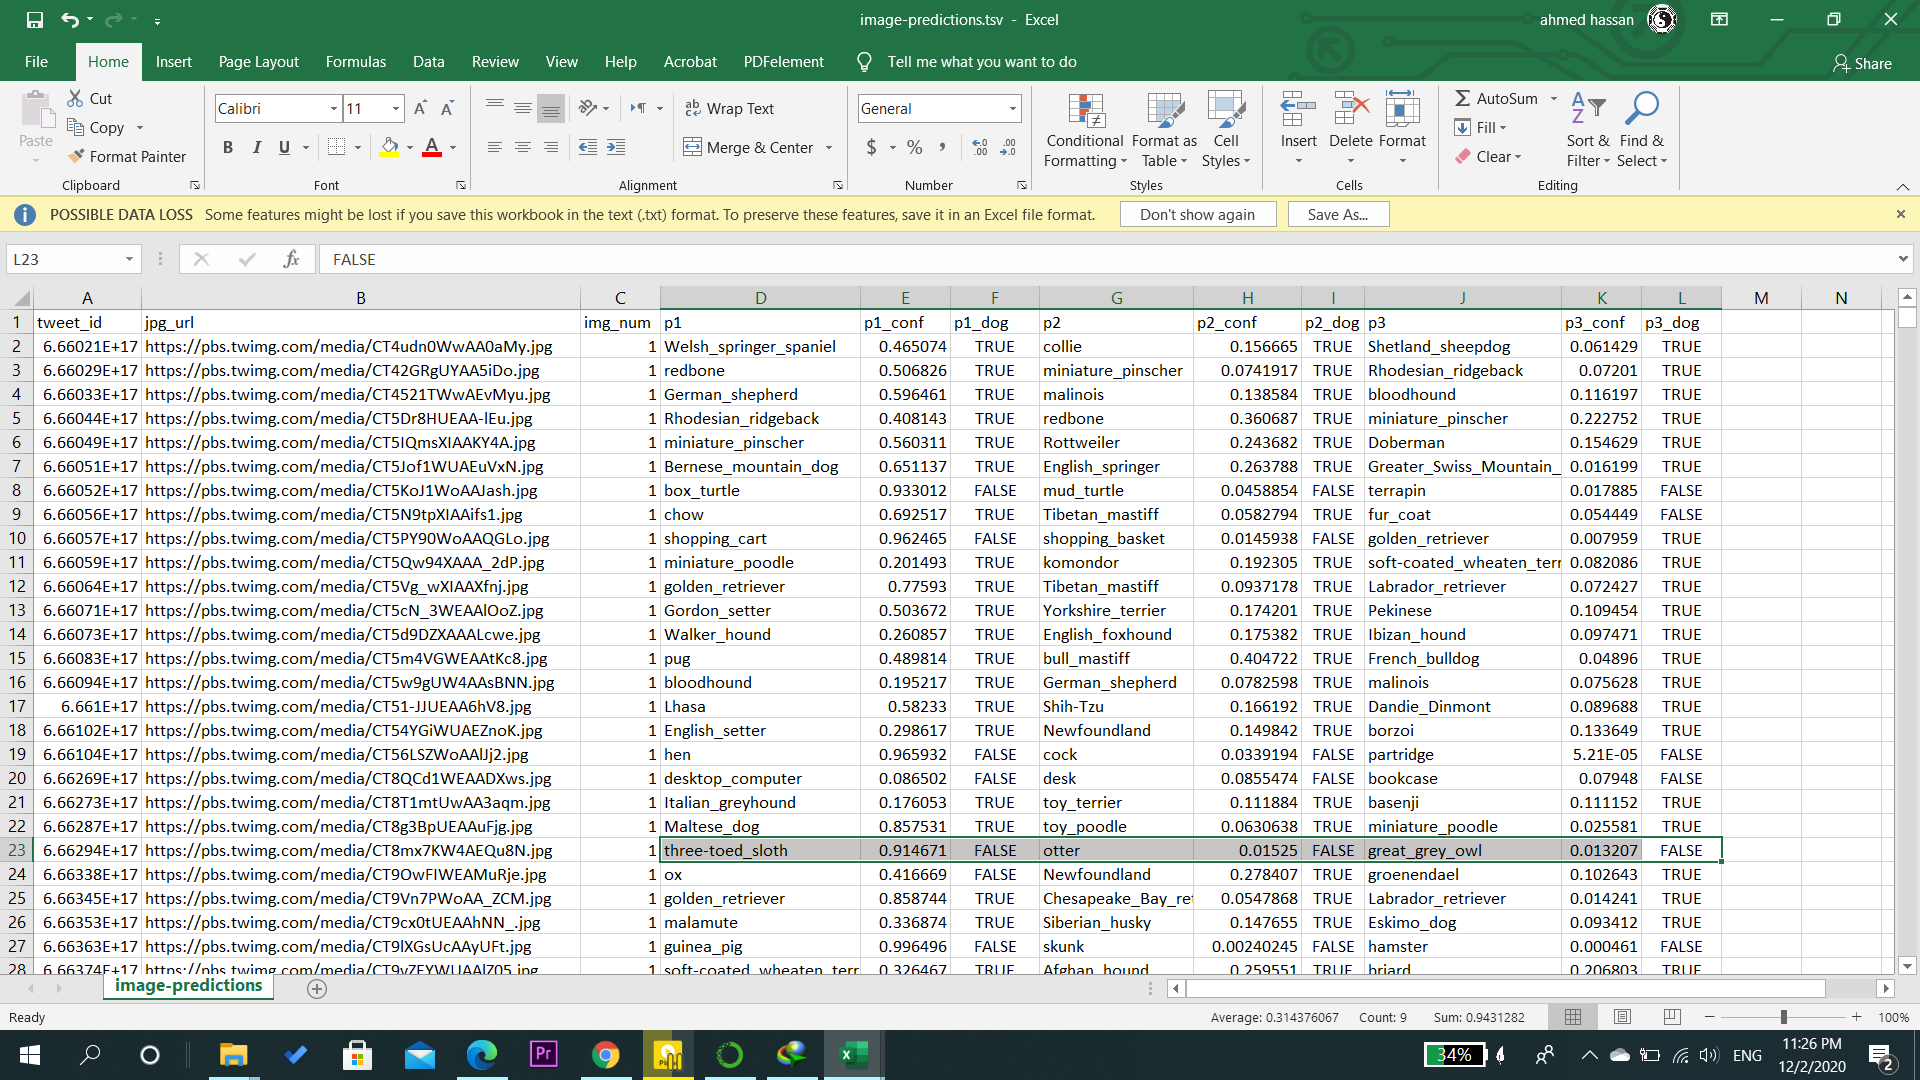

In [16]:
archive = twitter_archives

In [17]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Quality¶


# archive Table
1 - Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and some in expanded_urls.

2 - Columns doggo, floofer, pupper, puppo have wronge type of data as their value are none not nan.

3 - Some columns of doggo, floofer, pupper, puppo have more than one value.

4 - timestamp has wrong type of data , should be datetime64

5 - i think it is better to turn tweet_id to string as it is a key of thw data not a num value.

6 - the column 'retweeted_status_id' has 181 non-null , these duplicated tweets should be deleted.

# Tidiness
# archive Table
1 - i think that in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns do not have any use and it is better to get rid of them as there hold unique values and we do not need them.(delete)

In [18]:
print(archive.name.value_counts().head(40))
print(archive.name.value_counts().sample(30))


None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
Sadie        8
the          8
an           7
Toby         7
Buddy        7
Bailey       7
Daisy        7
Jack         6
Jax          6
Milo         6
Rusty        6
Scout        6
Koda         6
Bella        6
Oscar        6
Leo          6
Stanley      6
Dave         6
Sunny        5
Sammy        5
Chester      5
Larry        5
Phil         5
Finn         5
Oakley       5
Gus          5
Bentley      5
very         5
Louis        5
Name: name, dtype: int64
Shadoe        1
Shelby        1
Sammy         5
Hunter        2
his           1
Juno          2
Claude        1
Jackie        1
Ralphie       1
Brandi        1
Traviss       1
Mollie        1
Darrel        1
Kobe          1
Chelsea       2
Alfie         5
Bert          1
Chubbs        1
Ruffles       1
Sonny         1
Rupert        1
Atlas         2
Louie         3
officia

# Quality¶
# archive Table

7 - colum name has missing names , maybe that data got lost and got replaced by none // and there are wrong names like a and an and o

In [19]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

# Quality¶
# archive Table

8 - there is something wrong need to be checked, i think every tweet above 14 need to reviewed.

In [20]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

# Quality¶
# archive Table

9 - any number not equal 10 should be reviewed.

In [21]:
imgs = image_predictions

In [22]:
imgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
imgs.p1.value_counts()


golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
lynx                    1
starfish                1
pencil_box              1
cowboy_boot             1
clumber                 1
Name: p1, Length: 378, dtype: int64

In [24]:
imgs.p1.value_counts().head(50)


golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Shetland_sheepdog                  18
beagle                             18
teddy                              18
Maltese_dog                        18
Rottweiler                         17
Shih-Tzu    

# Quality¶
# imgs Table

1 - upper & lower case missy in colums of dog type prediction p1 & p2 & p3

2 - i am sure that all image_predictions.p1 regestered 1 time is other thing or other animal , not a dog ,,, i need to check that
3 - teddy & web_site  has captured my eyes , need to checked

4 - Incorrect data type for tweet id.

In [25]:
api = api_df_now

In [26]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


# Quality¶
# api Table

1 - Incorrect data type for tweet id.


# Tidiness

All three tables will eventually be merged into one.


# archive Table


# Quality¶

1 - the column 'retweeted_status_id' has 181 non-null , these duplicated tweets should be deleted.( i will delete all retweet before deleting the column itself.

2 - Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and some in expanded_urls.

3 - Columns doggo, floofer, pupper, puppo have wronge type of data as their value are none not nan.

4 - Some columns of doggo, floofer, pupper, puppo have more than one value.

5 - timestamp has wrong type of data , should be datetime64

6 - i think it is better to turn tweet_id to string as it is a key of thw data not a num value.

7 - colum name has missing names , maybe that data got lost and got replaced by none // and there are wrong names like a and an and o

8 - there is something wrong need to be checked, i think every tweet above 14 need to reviewed.

9 - any number not equal 10 should be reviewed.

# Tidiness
1 - i think that in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns do not have any use and it is better to get rid of them as there hold unique values and we do not need them.(delete)




# imgs Table


# Quality¶

1 - upper & lower case missy in colums of dog type prediction p1 & p2 & p3

2 - i am sure that all image_predictions.p1 regestered 1 time is other thing or other animal , not a dog ,,, i need to check that
3 - teddy & web_site  has captured my eyes , need to checked

4 - Incorrect data type for tweet id.




# api Table


# Quality¶

1 - Incorrect data type for tweet id.


# Tidiness

All three tables will eventually be merged into one.




# Cleaning 

Make copies before cleaning

In [27]:
archive_clean = archive.copy()
imgs_clean = imgs.copy()
api_clean = api.copy()

# cleaning archive 
1 . Remove all retweets( the rows with non null values in retweeted_status_id )


In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [29]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [30]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

i will delete in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp as tidiness 1

In [31]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] , axis=1)

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


create new column helds the type of the dog 

In [33]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [34]:
#replace none with nothing
archive_clean.doggo = archive_clean.doggo.replace('None','')
archive_clean.floofer = archive_clean.floofer.replace('None','')
archive_clean.pupper = archive_clean.pupper.replace('None','')
archive_clean.puppo = archive_clean.puppo.replace('None','')

In [35]:
archive_clean.head(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,


In [36]:
#concatenate
archive_clean['dog_breed'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [37]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


In [38]:
#remove the 4 columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [39]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [40]:
archive_clean.dog_breed.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_breed, dtype: int64

In [41]:
archive_clean.loc[archive_clean.dog_breed == 'doggopupper', 'dog_breed'] = 'doggo-pupper'
archive_clean.loc[archive_clean.dog_breed == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'
archive_clean.loc[archive_clean.dog_breed == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'

In [42]:
#seperate duplicated types
archive_clean.dog_breed.loc[archive_clean.dog_breed == 'doggo-pupper']

460     doggo-pupper
531     doggo-pupper
565     doggo-pupper
575     doggo-pupper
705     doggo-pupper
733     doggo-pupper
889     doggo-pupper
956     doggo-pupper
1063    doggo-pupper
1113    doggo-pupper
Name: dog_breed, dtype: object

In [43]:
archive_clean.dog_breed = archive_clean.dog_breed.replace('', np.nan)

In [44]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   dog_breed           344 non-null    object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


In [46]:
#turn tweet_id to str
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
imgs_clean['tweet_id'] = imgs_clean['tweet_id'].astype('str')
api_clean['tweet_id'] = api_clean['tweet_id'].astype('str')


In [47]:
#turn timestamp to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])


In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   dog_breed           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 169.9+ KB


In [49]:
archive_clean.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [50]:
wr_num = [0,1,2,3,4,420,15,     
75  ,    
80    ,    
20    ,    
24     ,   
26      ,  
44       , 
50        ,
60        ,
165     ,
84       , 
88        ,
144       ,
182       ,
143       ,
666       ,
960       ,
1776      ,
17        ,
27        ,
45        ,
99        ,
121       ,
204      ]

In [51]:
pd.options.display.max_colwidth = 500
pd.set_option('display.max_rows', None)

In [52]:
archive_clean.loc[archive['rating_numerator'].isin(wr_num),['text','rating_numerator','rating_denominator']].sample(81)

,text,rating_numerator,rating_denominator
2038,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,1,10
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1016,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10
2237,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2,2,10
1629,This is Bobby. He doesn't give a damn about personal space. Convinced he called shotgun first. 4/10 not the best dog https://t.co/b8XW69gSaU,4,10
1869,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
2334,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,3,10
2222,Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused. Overall 4/10 https://t.co/YOHe6lf09m,4,10
2136,This is Tommy. He's a cool dog. Hard not to step on. Won't let go of seashell. Not fast by any means. 3/10 https://t.co/0gY6XTOpn3,3,10


In [53]:
archive_clean.drop(archive_clean.loc[archive['rating_numerator'] == 204 ].index, inplace=True)


In [54]:
archive_clean.loc[archive['rating_numerator'].isin(wr_num),['text','rating_numerator','rating_denominator']].sample(80)

,text,rating_numerator,rating_denominator
2183,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,3,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
1920,This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,2,10
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1601,This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf,3,10
2038,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,1,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
2310,Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,2,10


In [55]:
archive_clean.loc[archive['rating_numerator'] == 0 ,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1016,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10


In [56]:
archive_clean.loc[archive_clean['rating_numerator'] == 1,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
1446,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,1,10
1869,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1,10
1940,The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,1,10
2038,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,1,10
2091,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,1,10
2261,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1,10
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
2338,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,1,10


In [57]:
#correct tweet with tweet id 666287406224695296
archive_clean.loc[archive_clean['tweet_id'] == '666287406224695296' , 'rating_numerator' ] = 9
archive_clean.loc[archive_clean['tweet_id'] == '666287406224695296' , 'rating_denominator' ] = 10


In [58]:
archive_clean.loc[archive_clean['tweet_id'] == '666287406224695296' ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,NaN


In [59]:
archive_clean.loc[archive_clean['rating_numerator'] == 2,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
1761,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,2,10
1764,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2,10
1920,This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,2,10
2079,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",2,10
2237,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2,2,10
2246,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,2,10
2310,Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,2,10
2326,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,2,10
2349,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,2,10


In [60]:
archive_clean.loc[archive_clean['rating_numerator'] == 3,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
1314,706901761596989440,This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,3,10
1406,699088579889332224,This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7,3,10
1478,693590843962331137,Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx,3,10
1601,686003207160610816,This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf,3,10
1692,681302363064414209,This is Chuck. He's a neat dog. Very flexible. Trapped in a glass case of emotion. Devastatingly unfluffy 3/10 https://t.co/YqbU9xHV3p,3,10
1836,676098748976615425,Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10 https://t.co/REyE5YKVBb,3,10
1898,674690135443775488,Meet Patrick. He's an exotic pup. Jumps great distances for a dog. Always gets injured when I toss him a ball. 3/10 https://t.co/Unz1uNrOzo,3,10


In [61]:
archive_clean.loc[archive_clean['rating_numerator'] == 4,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
883,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4,10
912,757596066325864448,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4,10
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1219,714631576617938945,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4,10
1303,707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10
1598,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4,20
1629,684567543613382656,This is Bobby. He doesn't give a damn about personal space. Convinced he called shotgun first. 4/10 not the best dog https://t.co/b8XW69gSaU,4,10
1701,680940246314430465,This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,4,10


In [62]:
#correct 722974582966214656 , 686035780142297088
archive_clean.loc[archive_clean['tweet_id'] == '722974582966214656' , 'rating_numerator' ] = 13
archive_clean.loc[archive_clean['tweet_id'] == '722974582966214656' , 'rating_denominator' ] = 10

archive_clean.loc[archive_clean['tweet_id'] == '686035780142297088' , 'rating_numerator' ] = 2
archive_clean.loc[archive_clean['tweet_id'] == '686035780142297088' , 'rating_denominator' ] = 10


In [63]:
archive_clean.loc[archive_clean['tweet_id'] == '722974582966214656' ]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,None,NaN


In [64]:
archive_clean.loc[archive_clean['tweet_id'] == '686035780142297088' ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
1598,686035780142297088,2016-01-10 04:04:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,2,10,None,NaN


In [65]:
wr_num 

[0,
 1,
 2,
 3,
 4,
 420,
 15,
 75,
 80,
 20,
 24,
 26,
 44,
 50,
 60,
 165,
 84,
 88,
 144,
 182,
 143,
 666,
 960,
 1776,
 17,
 27,
 45,
 99,
 121,
 204]

In [66]:
archive_clean.loc[archive_clean['rating_numerator'] ==420 ,['tweet_id','text','rating_numerator','rating_denominator']]
#i think i should delete it for bertter results but i will leave it for now 
#i will delete 670842764863651840 because the image for the singer snopy dog
archive_clean.drop(archive_clean.loc[archive_clean['tweet_id'] == '670842764863651840' ].index, inplace=True)


In [67]:
archive_clean.loc[archive_clean['rating_numerator'] ==420 ,['tweet_id','text','rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10


In [68]:
wr_num_cut = [75,80,20,24,26,44,50]

In [69]:
archive_clean.loc[archive['rating_numerator'].isin(wr_num_cut),['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1663,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [70]:
#delete 810984652412424192
archive_clean.drop(archive_clean.loc[archive_clean['tweet_id'] == '810984652412424192' ].index, inplace=True)


In [71]:
archive_clean.loc[archive['rating_numerator'].isin(wr_num_cut),['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1663,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [72]:
#correct 786709082849828864 , 716439118184652801 , 710658690886586372 , 697463031882764288 , 682808988178739200 , 680494726643068929
archive_clean.loc[archive_clean['tweet_id'] == '786709082849828864' , 'rating_numerator' ] = 9.75
archive_clean.loc[archive_clean['tweet_id'] == '716439118184652801' , 'rating_numerator' ] = 11
archive_clean.loc[archive_clean['tweet_id'] == '716439118184652801' , 'rating_denominator' ] = 10

archive_clean.loc[archive_clean['tweet_id'] == '710658690886586372' , 'rating_denominator' ] = 10
#there are 8 dogs , i will correct it to 10/10
archive_clean.loc[archive_clean['tweet_id'] == '710658690886586372' , 'rating_numerator' ] = 10
archive_clean.loc[archive_clean['tweet_id'] == '710658690886586372' , 'rating_denominator' ] = 10
#there are 4 dogs , i will correct it to 11/10
archive_clean.loc[archive_clean['tweet_id'] == '697463031882764288' , 'rating_numerator' ] = 11
archive_clean.loc[archive_clean['tweet_id'] == '697463031882764288' , 'rating_denominator' ] = 10
#delete 682808988178739200
archive_clean.drop(archive_clean.loc[archive_clean['tweet_id'] == '682808988178739200' ].index, inplace=True)

archive_clean.loc[archive_clean['tweet_id'] == '680494726643068929' , 'rating_numerator' ] = 11.26


In [73]:
archive_clean.loc[archive['rating_numerator'].isin(wr_num_cut),['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.00,10
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,10.00,10
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,11.00,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


In [74]:
wr_num_cut2 = [60,165,84,88,144,182,143,]

In [75]:
archive_clean.loc[archive['rating_numerator'].isin(wr_num_cut2),['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
290,838150277551247360,@markhoppus 182/10,182.0,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120
1843,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80


In [76]:
# 820690176645140481 there are 7 dogs , i will correct it to 12/10
archive_clean.loc[archive_clean['tweet_id'] == '820690176645140481' , 'rating_numerator' ] = 12
archive_clean.loc[archive_clean['tweet_id'] == '820690176645140481' , 'rating_denominator' ] = 10
#758467244762497024 it is video for many dogs, i will leaeve it for now
# 704054845121142784 there are 5 dogs , i will correct it to 12/10
archive_clean.loc[archive_clean['tweet_id'] == '704054845121142784' , 'rating_numerator' ] = 12
archive_clean.loc[archive_clean['tweet_id'] == '704054845121142784' , 'rating_denominator' ] = 10
# 675853064436391936 there are 7 dogs , i will correct it to 11/10
archive_clean.loc[archive_clean['tweet_id'] == '675853064436391936' , 'rating_numerator' ] = 11
archive_clean.loc[archive_clean['tweet_id'] == '675853064436391936' , 'rating_denominator' ] = 10


In [77]:
archive_clean.loc[archive['rating_numerator'].isin(wr_num_cut2),['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
290,838150277551247360,@markhoppus 182/10,182.0,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,12.0,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,12.0,10
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120
1843,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,11.0,10


In [78]:
wr_num_cut3 = [666, 960, 1776, 17, 27, 45, 99, 121, 204]

In [79]:
archive_clean.loc[archive['rating_numerator'].isin(wr_num_cut3),['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17.0,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110


In [80]:
#correct 881633300179243008 to 13/10
archive_clean.loc[archive_clean['tweet_id'] == '881633300179243008' , 'rating_numerator' ] = 13
#correct 835246439529840640 13/10
archive_clean.loc[archive_clean['tweet_id'] == '835246439529840640' , 'rating_numerator' ] = 13
archive_clean.loc[archive_clean['tweet_id'] == '835246439529840640' , 'rating_denominator' ] = 10
#correct 778027034220126208  11.27/10
archive_clean.loc[archive_clean['tweet_id'] == '881633300179243008' , 'rating_numerator' ] = 11.27
# 713900603437621249 there are 9 dogs , i will correct it to 11/10
archive_clean.loc[archive_clean['tweet_id'] == '713900603437621249' , 'rating_numerator' ] = 11
archive_clean.loc[archive_clean['tweet_id'] == '713900603437621249' , 'rating_denominator' ] = 10
# 709198395643068416 there are 5 dogs , i will correct it to 9/10
archive_clean.loc[archive_clean['tweet_id'] == '709198395643068416' , 'rating_numerator' ] = 9
archive_clean.loc[archive_clean['tweet_id'] == '709198395643068416' , 'rating_denominator' ] = 10
# 684222868335505415 there are 11 dogs , i will correct it to 11/10
archive_clean.loc[archive_clean['tweet_id'] == '684222868335505415' , 'rating_numerator' ] = 11
archive_clean.loc[archive_clean['tweet_id'] == '684222868335505415' , 'rating_denominator' ] = 10

In [81]:
archive_clean.loc[archive['rating_numerator'].isin(wr_num_cut3),['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,11.27,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.00,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.00,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.00,10
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.00,10
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,11.00,10
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",9.00,10
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,11.00,10


In [82]:
archive_clean.rating_denominator.value_counts()

10     2165
11        2
15        1
150       1
130       1
120       1
Name: rating_denominator, dtype: int64

In [83]:
archive_clean.loc[archive['rating_denominator'] == 11 ,['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11


In [84]:
#correct 740373189193256964 to 14/10
archive_clean.loc[archive_clean['tweet_id'] == '740373189193256964' , 'rating_numerator' ] = 14
archive_clean.loc[archive_clean['tweet_id'] == '740373189193256964' , 'rating_denominator' ] = 10
#correct 682962037429899265 to 10/10
archive_clean.loc[archive_clean['tweet_id'] == '682962037429899265' , 'rating_numerator' ] = 10
archive_clean.loc[archive_clean['tweet_id'] == '682962037429899265' , 'rating_denominator' ] = 10

In [85]:
archive_clean.loc[archive['rating_denominator'] == 11 ,['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.0,10


In [86]:
archive_clean.loc[archive['rating_denominator'] == 15 ,['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11.0,15


In [87]:
#delete 832088576586297345
archive_clean.drop(archive_clean.loc[archive_clean['tweet_id'] == '832088576586297345' ].index, inplace=True)


In [88]:
archive_clean.loc[archive['rating_denominator'] == 15 ,['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator


In [89]:
archive_clean.loc[archive['rating_denominator'] == 150 ,['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150


In [90]:
#delete 758467244762497024
archive_clean.drop(archive_clean.loc[archive_clean['tweet_id'] == '758467244762497024' ].index, inplace=True)


In [91]:
archive_clean.loc[archive['rating_denominator'] == 150 ,['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator


In [92]:
archive_clean.loc[archive['rating_denominator'] == 130 ,['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130


In [93]:
#delete 684225744407494656
archive_clean.drop(archive_clean.loc[archive_clean['tweet_id'] == '684225744407494656' ].index, inplace=True)


In [94]:
archive_clean.loc[archive['rating_denominator'] == 120 ,['tweet_id','text','rating_numerator','rating_denominator']].head(50)

,tweet_id,text,rating_numerator,rating_denominator
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120


In [95]:
#delete 677716515794329600
archive_clean.drop(archive_clean.loc[archive_clean['tweet_id'] == '677716515794329600' ].index, inplace=True)


In [96]:
archive_clean.rating_denominator.value_counts()

10    2167
Name: rating_denominator, dtype: int64

In [97]:
imgs_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [98]:
# imgs Table
#Quality¶
# upper & lower case missy in colums of dog type prediction p1 & p2 & p3
imgs_clean['p1'] = imgs_clean['p1'].str.lower()
imgs_clean['p2'] = imgs_clean['p2'].str.lower()
imgs_clean['p3'] = imgs_clean['p3'].str.lower()

In [99]:
imgs_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [100]:
api_clean.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


# MERGE

In [101]:
#merge archive_clean & api_clean
merge1 = archive_clean.join(api_clean.set_index('tweet_id'), on='tweet_id')

In [102]:
merge1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,user_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,9774,41048,3200889


In [103]:
#merge ++ imgs_clean

merge2 = merge1.join(imgs_clean.set_index('tweet_id'), on='tweet_id')

In [104]:
#copy
final_df = merge2
final_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6514,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,4328,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,8964,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,9774,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [105]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2167 non-null   object             
 1   timestamp           2167 non-null   datetime64[ns, UTC]
 2   source              2167 non-null   object             
 3   text                2167 non-null   object             
 4   expanded_urls       2111 non-null   object             
 5   rating_numerator    2167 non-null   float64            
 6   rating_denominator  2167 non-null   int64              
 7   name                2167 non-null   object             
 8   dog_breed           344 non-null    object             
 9   retweet_count       2167 non-null   int64              
 10  favorite_count      2167 non-null   int64              
 11  user_count          2167 non-null   int64              
 12  jpg_url             1988 non-null 

In [106]:
#delete any tweet without img
final_df = final_df[final_df['jpg_url'].notna()]

In [107]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1988 non-null   object             
 1   timestamp           1988 non-null   datetime64[ns, UTC]
 2   source              1988 non-null   object             
 3   text                1988 non-null   object             
 4   expanded_urls       1988 non-null   object             
 5   rating_numerator    1988 non-null   float64            
 6   rating_denominator  1988 non-null   int64              
 7   name                1988 non-null   object             
 8   dog_breed           306 non-null    object             
 9   retweet_count       1988 non-null   int64              
 10  favorite_count      1988 non-null   int64              
 11  user_count          1988 non-null   int64              
 12  jpg_url             1988 non-null 

In [108]:
final_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6514,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,4328,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,8964,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,9774,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,NaN,3261,...,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN,2158,...,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,None,NaN,16716,...,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True

In [109]:
# multiplying 100 to each of p1 , p2 , p3 to create percentage
final_df.p1_conf = final_df.p1_conf.apply(lambda x: round(x*100, 2))
final_df.p2_conf = final_df.p2_conf.apply(lambda x: round(x*100, 2))
final_df.p3_conf = final_df.p3_conf.apply(lambda x: round(x*100, 2))

C:\Users\ahmed\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [110]:
final_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,8853,...,1.0,orange,9.70,False,bagel,8.59,False,banana,7.61,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6514,...,1.0,chihuahua,32.36,True,pekinese,9.06,True,papillon,6.90,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,4328,...,1.0,chihuahua,71.60,True,malamute,7.83,True,kelpie,3.14,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,8964,...,1.0,paper_towel,17.03,False,labrador_retriever,16.81,True,spatula,4.08,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,9774,...,2.0,basset,55.57,True,english_springer,22.58,True,german_short-haired_pointer,17.52,True
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,NaN,3261,...,1.0,chesapeake_bay_retriever,42.56,True,irish_terrier,11.63,True,indian_elephant,7.69,False
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN,2158,...,1.0,appenzeller,34.17,True,border_collie,19.93,True,ice_lolly,19.35,False
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,None,NaN,16716,...,2.0,pomeranian,56.61,True,eskimo_dog,17.84,True,pembroke,7.65,True
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/down

In [111]:
final_df.rating_denominator.value_counts()

10    1988
Name: rating_denominator, dtype: int64

In [112]:
final_df.rating_numerator.value_counts()

12.00      452
10.00      421
11.00      401
13.00      262
9.00       152
8.00        95
7.00        51
14.00       36
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
0.00         2
1776.00      1
9.75         1
11.26        1
27.00        1
Name: rating_numerator, dtype: int64

In [113]:
final_df.loc[final_df.rating_numerator == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,NaN,2772,...,1.0,bow_tie,53.39,False,sunglasses,8.08,False,sunglass,5.08,False


In [114]:
#This is Atticus. He's quite simply America af. 1776/10 ,, i think he do not mean that as serious , but for independence day
#will remove it
final_df.drop(final_df.loc[final_df['tweet_id'] == '749981277374128128' ].index, inplace=True)


C:\Users\ahmed\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [115]:
final_df.loc[final_df.rating_numerator == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [116]:
final_df.rating_numerator.value_counts()

12.00    452
10.00    421
11.00    401
13.00    262
9.00     152
8.00      95
7.00      51
14.00     36
5.00      33
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
0.00       2
11.26      1
27.00      1
9.75       1
Name: rating_numerator, dtype: int64

# Storing
Storing the final cleaned datasets to csv files.



In [117]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)
imgs_clean.to_csv('image_predicitons_master.csv', index = False)
api_clean.to_csv('tweet_counts_master.csv', index = False)
final_df.to_csv('master_dataframe .csv', index = False)


# Analyzing the Data
Analysis and Visualization


In [118]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   object             
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   rating_numerator    1987 non-null   float64            
 6   rating_denominator  1987 non-null   int64              
 7   name                1987 non-null   object             
 8   dog_breed           306 non-null    object             
 9   retweet_count       1987 non-null   int64              
 10  favorite_count      1987 non-null   int64              
 11  user_count          1987 non-null   int64              
 12  jpg_url             1987 non-null 

In [119]:
final_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,user_count,img_num,p1_conf,p2_conf,p3_conf
count,1987.000000,1987.0,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,10.560649,10.0,2769.420735,8910.109713,3.200946e+06,1.203322,59.437106,13.465315,6.026975
std,2.210941,0.0,4682.141509,12231.740163,4.482453e+01,0.561369,27.195235,10.076823,5.095842
min,0.000000,10.0,16.000000,81.000000,3.200799e+06,1.000000,4.430000,0.000000,0.000000
25%,10.000000,10.0,623.500000,1976.000000,3.200901e+06,1.000000,36.285000,5.410000,1.610000
50%,11.000000,10.0,1350.000000,4127.000000,3.200947e+06,1.000000,58.780000,11.810000,4.950000
75%,12.000000,10.0,3222.000000,11347.500000,3.201002e+06,1.000000,84.680000,19.550000,9.165000
max,27.000000,10.0,79515.000000,132810.000000,3.201018e+06,4.000000,100.000000,48.800000,27.340000


 * the data followes a logical pattern without abnormal values as we see the max in rating_numerator is 27 as i eliminated the abnormal values for more valuable results
 

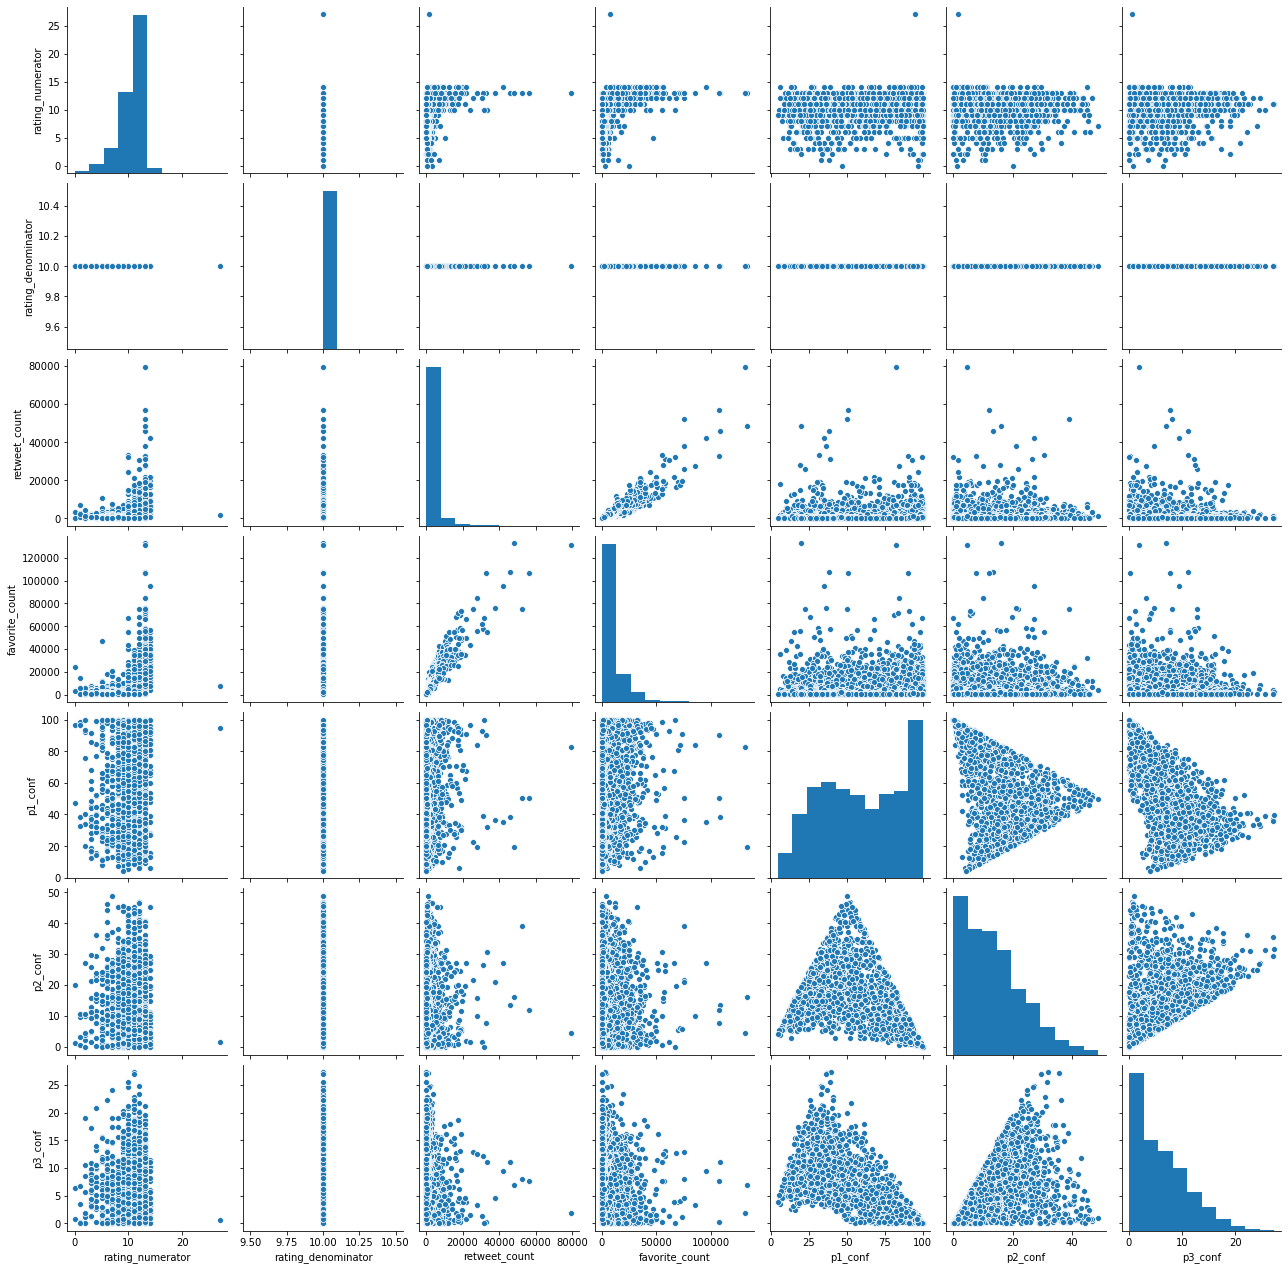

In [120]:
sns.pairplot(final_df, vars=["rating_numerator", "rating_denominator", "retweet_count", "favorite_count", "p1_conf", "p2_conf", "p3_conf"]);


# track retweet and favorite in time 
make timestampe as index 


In [121]:
final_df = final_df.set_index('timestamp')


In [122]:
final_df.head(50)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-01 16:23:56+00:00,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,8853,39467,...,1.0,orange,9.70,False,bagel,8.59,False,banana,7.61,False
2017-08-01 00:17:27+00:00,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6514,33819,...,1.0,chihuahua,32.36,True,pekinese,9.06,True,papillon,6.90,True
2017-07-31 00:18:03+00:00,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,4328,25461,...,1.0,chihuahua,71.60,True,malamute,7.83,True,kelpie,3.14,True
2017-07-30 15:58:51+00:00,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,8964,42908,...,1.0,paper_towel,17.03,False,labrador_retriever,16.81,True,spatula,4.08,False
2017-07-29 16:00:24+00:00,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,9774,41048,...,2.0,basset,55.57,True,english_springer,22.58,True,german_short-haired_pointer,17.52,True
2017-07-29 00:08:17+00:00,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,NaN,3261,20562,...,1.0,chesapeake_bay_retriever,42.56,True,irish_terrier,11.63,True,indian_elephant,7.69,False
2017-07-28 16:27:12+00:00,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN,2158,12041,...,1.0,appenzeller,34.17,True,border_collie,19.93,True,ice_lolly,19.35,False
2017-07-28 00:22:40+00:00,890729181411237888,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,None,NaN,16716,56848,...,2.0,pomeranian,56.61,True,eskimo_dog,17.84,True,pembroke,7.65,True
2017-07-27 16

In [123]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1987 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   object 
 1   source              1987 non-null   object 
 2   text                1987 non-null   object 
 3   expanded_urls       1987 non-null   object 
 4   rating_numerator    1987 non-null   float64
 5   rating_denominator  1987 non-null   int64  
 6   name                1987 non-null   object 
 7   dog_breed           306 non-null    object 
 8   retweet_count       1987 non-null   int64  
 9   favorite_count      1987 non-null   int64  
 10  user_count          1987 non-null   int64  
 11  jpg_url             1987 non-null   object 
 12  img_num             1987 non-null   float64
 13  p1                  1987 non-null   object 
 14  p1_conf             1987 non-null   float64
 15  p1_dog 

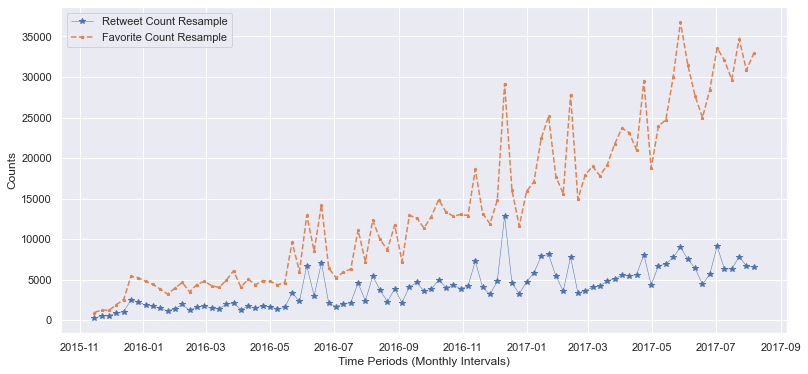

In [124]:
# show the change in favorit and retweet counts over time
retweet_resamp = final_df['retweet_count'].resample('1w').mean()
favorite_resamp = final_df['favorite_count'].resample('1w').mean()
sns.set(rc={'figure.figsize':(13, 6)})
fig, ax = plt.subplots()
ax.plot(retweet_resamp, marker='*', linestyle='-', linewidth=0.5, label='Retweet Count Resample')
ax.plot(favorite_resamp, marker='*', markersize=3, linestyle='--', label='Favorite Count Resample')
ax.set_ylabel('Counts')
ax.set_xlabel('Time Periods (Monthly Intervals)')
ax.legend();

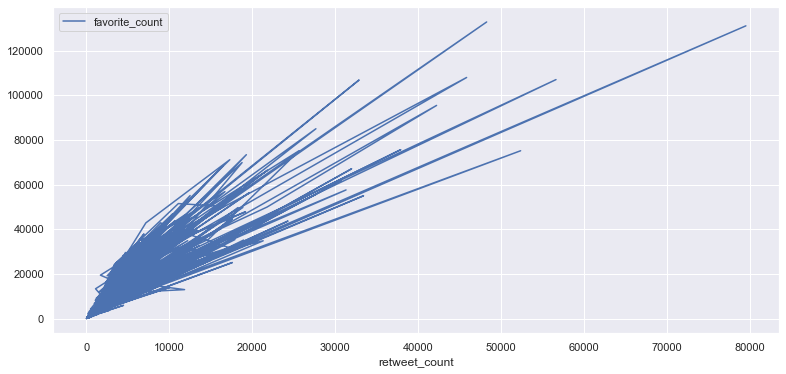

In [125]:
final_df.plot(x='retweet_count', y='favorite_count')


# track retweet and favorite in time 
make timestampe as index 
 * this plot show the interaction with the accounts posts over time by track retweet count and favorite count, as we see, there is an evident upward trend in both retweet and favorite, especially in favorite.
 * these trends represent that people engagement with the posts is increasing over time which is a great indicator of the quality of content
 * there is also a clear association between retweet and favorite, as the trend show a Positive relationship  

i will seperate the dogs from the other predicted even animals or things for using it to 

1 - see the change and the deviation in the ratings over time and the interrelate between time and rates

2 - (dog_breed 306) show comparsion between the four types by bar plot

3 - (dog_breed 306) show comparsion between the four types by retweet and favorite

4 - (p1) the p1 between the kind of dog and retweet and favorite

5 - (p1) the p1 between the kind of dog by bar plot


In [126]:
#seperate the dogs from the others
final_df_dogs_only = final_df[final_df.p1_dog == True]
final_df_dogs_only.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-01 00:17:27+00:00,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6514,33819,...,1.0,chihuahua,32.36,True,pekinese,9.06,True,papillon,6.90,True
2017-07-31 00:18:03+00:00,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,4328,25461,...,1.0,chihuahua,71.60,True,malamute,7.83,True,kelpie,3.14,True
2017-07-29 16:00:24+00:00,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,9774,41048,...,2.0,basset,55.57,True,english_springer,22.58,True,german_short-haired_pointer,17.52,True
2017-07-29 00:08:17+00:00,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,NaN,3261,20562,...,1.0,chesapeake_bay_retriever,42.56,True,irish_terrier,11.63,True,indian_elephant,7.69,False
2017-07-28 16:27:12+00:00,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN,2158,12041,...,1.0,appenzeller,34.17,True,border_collie,19.93,True,ice_lolly,19.35,False


In [127]:
final_df_dogs_only.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1474 entries, 2017-08-01 00:17:27+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1474 non-null   object 
 1   source              1474 non-null   object 
 2   text                1474 non-null   object 
 3   expanded_urls       1474 non-null   object 
 4   rating_numerator    1474 non-null   float64
 5   rating_denominator  1474 non-null   int64  
 6   name                1474 non-null   object 
 7   dog_breed           228 non-null    object 
 8   retweet_count       1474 non-null   int64  
 9   favorite_count      1474 non-null   int64  
 10  user_count          1474 non-null   int64  
 11  jpg_url             1474 non-null   object 
 12  img_num             1474 non-null   float64
 13  p1                  1474 non-null   object 
 14  p1_conf             1474 non-null   float64
 15  p1_dog 

In [128]:
final_df_dogs_only.rating_numerator.value_counts()

12.00    382
10.00    319
11.00    312
13.00    215
9.00     109
8.00      58
7.00      24
14.00     22
6.00      12
5.00      10
4.00       4
3.00       3
11.26      1
2.00       1
27.00      1
9.75       1
Name: rating_numerator, dtype: int64

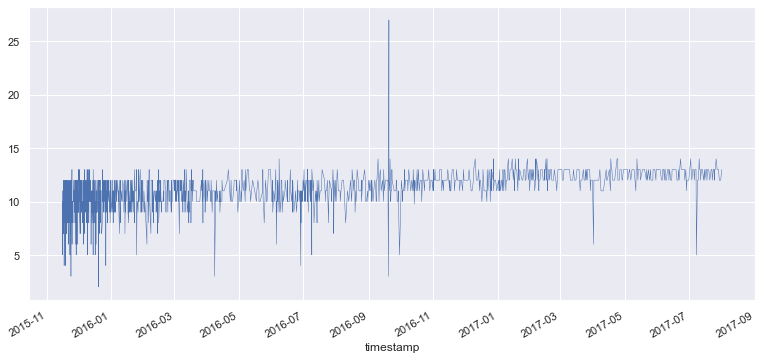

In [129]:
plot1 = final_df_dogs_only['rating_numerator'].plot(linewidth=0.5)
sns.set(rc={'figure.figsize':(15, 6)})


In [130]:
#i i will Exclude the anomaly values for a much better analyse.
normal_values = [12.00,10.00,11.00, 13.00, 9.00, 8.00, 7.00,14.00, 6.00, 5.00, 11.26,9.75]
plot2 = final_df_dogs_only.loc[final_df_dogs_only['rating_numerator'].isin(normal_values),['tweet_id','text','rating_numerator','rating_denominator']]
plot2.head()

,tweet_id,text,rating_numerator,rating_denominator
timestamp,,,,
2017-08-01 00:17:27+00:00,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10
2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10
2017-07-29 16:00:24+00:00,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10
2017-07-29 00:08:17+00:00,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10
2017-07-28 16:27:12+00:00,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10


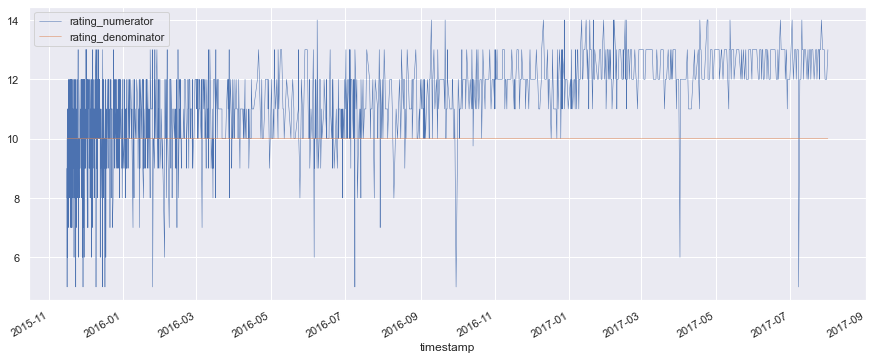

In [131]:
plot2.plot(linewidth=0.5)
sns.set(rc={'figure.figsize':(30, 8)})

# result
As we can see, in the first period, there was a large fluctuation in the evaluation,(from 2015 to march 2016) then it began to stabilize and rise slowly and steadily.
Which indicates that the performance rate has increased and the effect of that on the satisfaction rate.

In [132]:
final_df_dogs_only.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-01 00:17:27+00:00,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6514,33819,...,1.0,chihuahua,32.36,True,pekinese,9.06,True,papillon,6.9,True


In [133]:
final_df_dogs_only.dog_breed.value_counts()

pupper           144
doggo             48
puppo             19
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_breed, dtype: int64

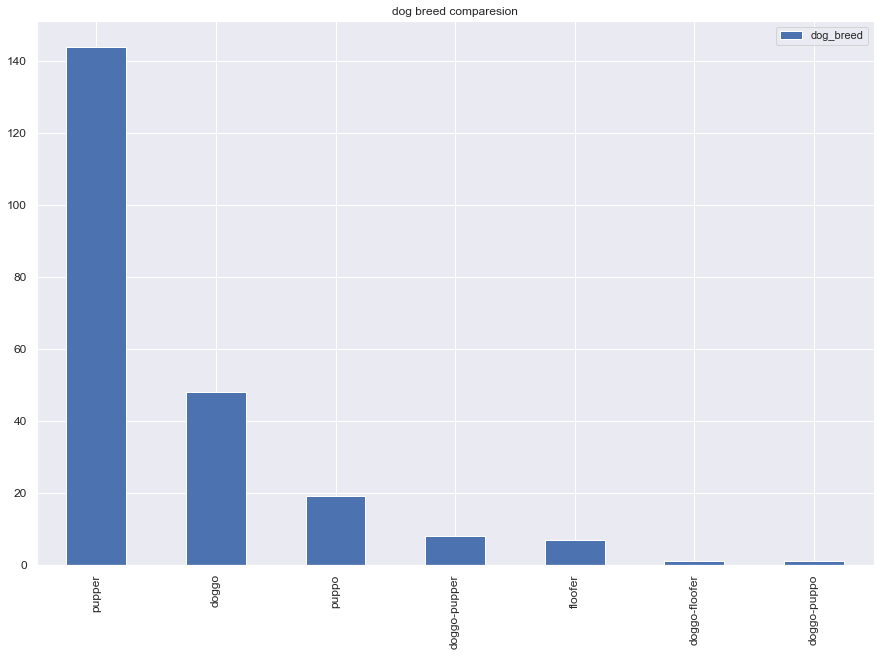

In [134]:
#2 - (dog_breed 306) show comparsion between the four types by bar plot

ax = final_df_dogs_only.dog_breed.value_counts().plot(kind='bar', title ="dog breed comparesion", figsize=(15, 10), legend=True, fontsize=12)


as this chart shows, pupper has the majority of available data.

In [135]:
#3 - (dog_breed 306) show comparsion between the four types by rates mean

dog_breed_statistics = final_df_dogs_only[final_df_dogs_only['dog_breed'].notna()]
dog_breed_statistics.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-26 15:59:51+00:00,890240255349198849,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,doggo,7711,32467,...,1.0,pembroke,51.13,True,cardigan,45.10,True,chihuahua,2.92,True
2017-07-25 01:55:32+00:00,889665388333682689,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13.0,10,None,puppo,8538,38818,...,1.0,pembroke,96.63,True,cardigan,2.74,True,basenji,0.46,True
2017-07-24 17:02:04+00:00,889531135344209921,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13.0,10,Stuart,puppo,2321,15359,...,1.0,golden_retriever,95.34,True,labrador_retriever,1.38,True,redbone,0.80,True
2017-07-15 23:25:31+00:00,886366144734445568,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12.0,10,Roscoe,pupper,3316,21524,...,1.0,french_bulldog,99.92,True,chihuahua,0.04,True,boston_bull,0.01,True
2017-07-09 21:29:42+00:00,884162670584377345,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12.0,10,Yogi,doggo,3128,20771,...,1.0,german_shepherd,70.70,True,malinois,19.94,True,norwegian_elkhound,4.91,True


In [136]:
# show the comparison between the four types by bar plot by the average rate
dog_breed_statistics.groupby(['dog_breed']).rating_numerator.mean()

dog_breed
doggo            12.020833
doggo-floofer    11.000000
doggo-pupper     11.125000
doggo-puppo      13.000000
floofer          12.000000
pupper           11.062500
puppo            12.000000
Name: rating_numerator, dtype: float64

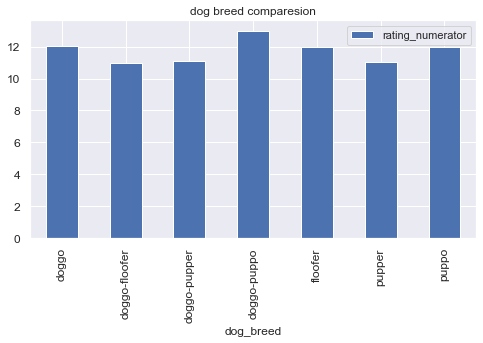

In [137]:
dog_breed_statistics.groupby(['dog_breed']).rating_numerator.mean().plot(kind='bar', title ="dog breed comparesion", figsize=(8, 4), legend=True, fontsize=12)


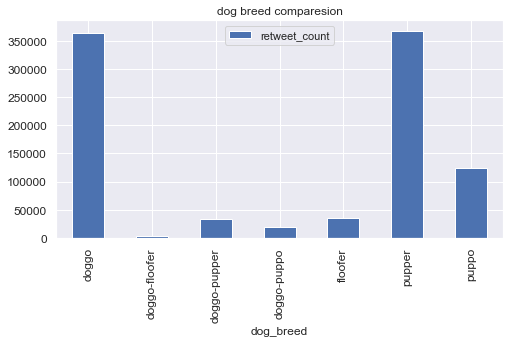

In [138]:
#3 - (dog_breed 306) show comparsion between the four types by retweet and favorite
dog_breed_statistics.groupby(['dog_breed']).retweet_count.sum().plot(kind='bar', title ="dog breed comparesion", figsize=(8, 4), legend=True, fontsize=12)


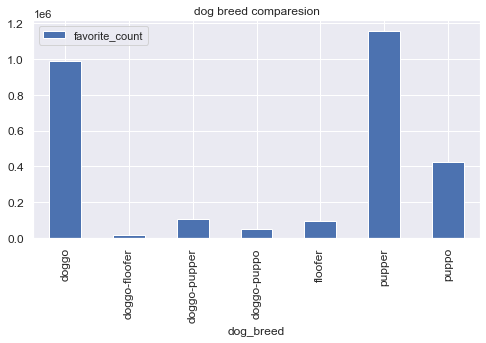

In [139]:
dog_breed_statistics.groupby(['dog_breed']).favorite_count.sum().plot(kind='bar', title ="dog breed comparesion", figsize=(8, 4), legend=True, fontsize=12)


4 - (p1) the p1 between the kind of dog and retweet and favorite

5 - (p1) the p1 between the kind of dog by bar plot

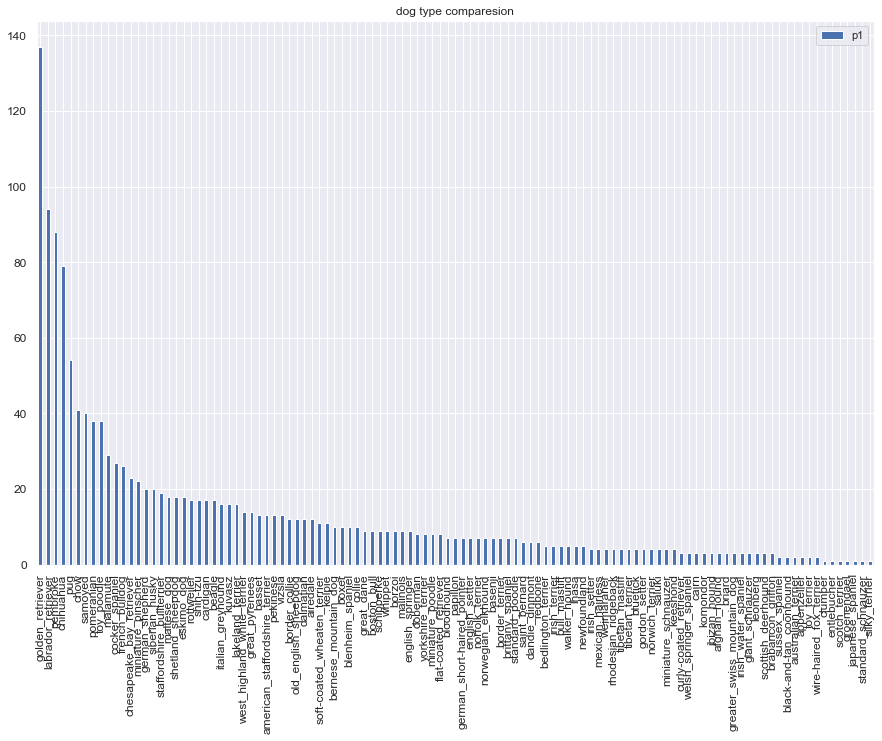

In [140]:
#5 - (p1) the p1 between the kind of dog by bar plot
final_df_dogs_only.p1.value_counts().plot(kind='bar', title ="dog type comparesion", figsize=(15, 10), legend=True, fontsize=12)


In [141]:
final_df_dogs_only.p1.value_counts()

golden_retriever                  137
labrador_retriever                 94
pembroke                           88
chihuahua                          79
pug                                54
chow                               41
samoyed                            40
pomeranian                         38
toy_poodle                         38
malamute                           29
cocker_spaniel                     27
french_bulldog                     26
chesapeake_bay_retriever           23
miniature_pinscher                 22
german_shepherd                    20
siberian_husky                     20
staffordshire_bullterrier          19
maltese_dog                        18
shetland_sheepdog                  18
eskimo_dog                         18
rottweiler                         17
shih-tzu                           17
cardigan                           17
beagle                             17
italian_greyhound                  16
kuvasz                             16
lakeland_ter

In [142]:
top_16 = final_df_dogs_only.p1.value_counts()[final_df_dogs_only.p1.value_counts() >= 20]
top_16

golden_retriever            137
labrador_retriever           94
pembroke                     88
chihuahua                    79
pug                          54
chow                         41
samoyed                      40
pomeranian                   38
toy_poodle                   38
malamute                     29
cocker_spaniel               27
french_bulldog               26
chesapeake_bay_retriever     23
miniature_pinscher           22
german_shepherd              20
siberian_husky               20
Name: p1, dtype: int64

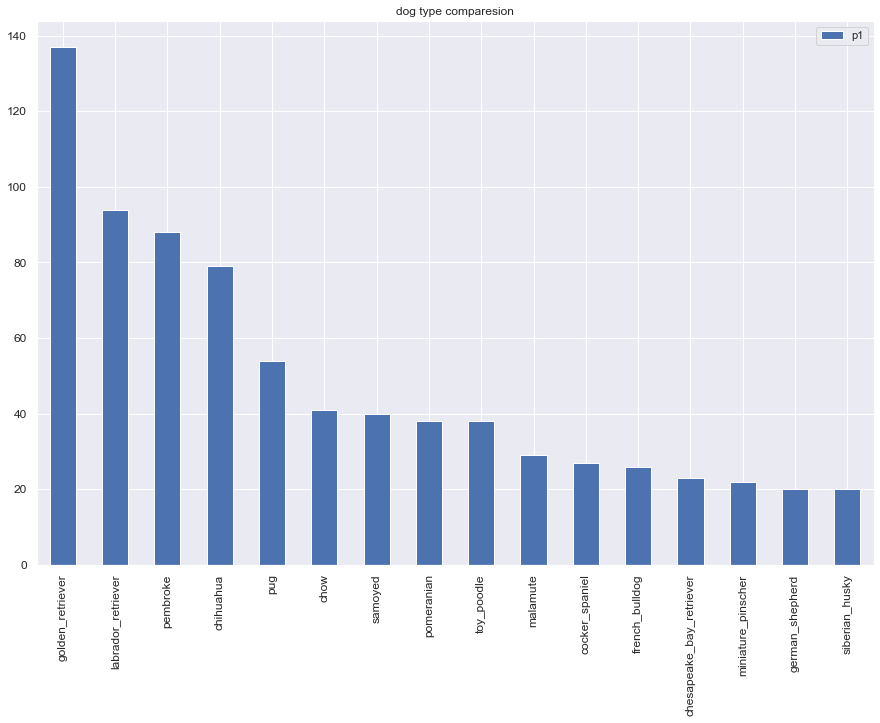

In [143]:
#5 - the most frequent dogs have been repeated ,, the p1 between the kind of dog by bar plot
top_16.plot(kind='bar', title ="dog type comparesion", figsize=(15, 10), legend=True, fontsize=12)

In [144]:
#4 - (p1) compare between the kinds of dogs by rate
kinds_rate = final_df_dogs_only.groupby(['p1']).rating_numerator.mean()
kinds_rate

p1
afghan_hound                       9.666667
airedale                           9.833333
american_staffordshire_terrier    11.000000
appenzeller                       11.000000
australian_terrier                11.500000
basenji                           10.285714
basset                            11.153846
beagle                            10.352941
bedlington_terrier                10.000000
bernese_mountain_dog              11.200000
black-and-tan_coonhound           10.500000
blenheim_spaniel                  11.100000
bloodhound                        10.428571
bluetick                          10.500000
border_collie                     10.583333
border_terrier                    12.142857
borzoi                            10.444444
boston_bull                        9.444444
boxer                             10.600000
brabancon_griffon                 10.000000
briard                            12.333333
brittany_spaniel                  10.428571
bull_mastiff                 

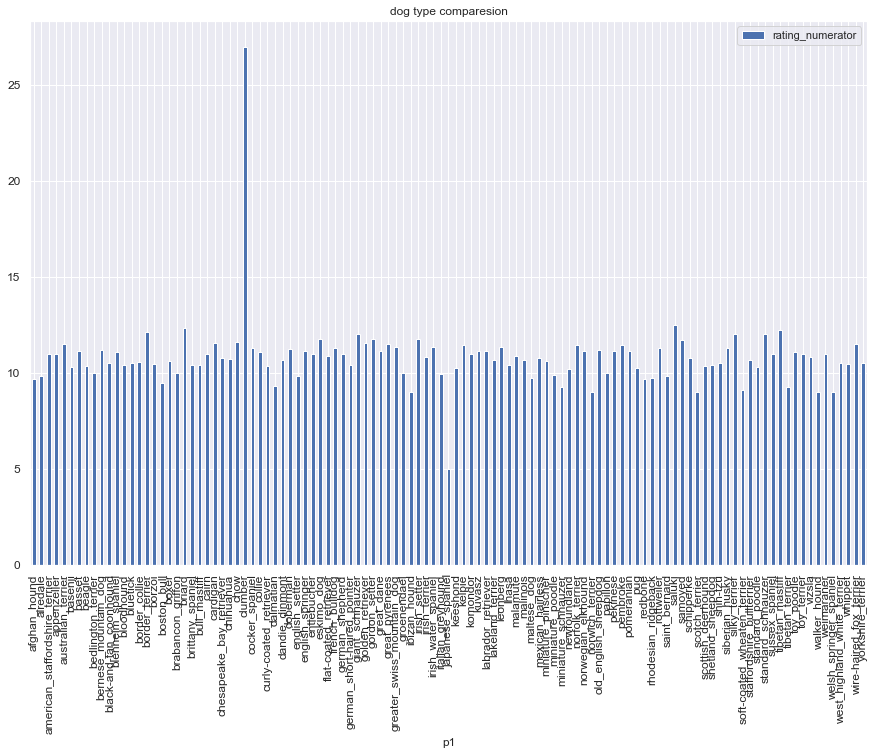

In [145]:
kinds_rate.plot(kind='bar', title ="dog type comparesion", figsize=(15, 10), legend=True, fontsize=12)

In [146]:
final_df_dogs_only.groupby(['p1']).rating_numerator.describe()

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
afghan_hound,3.0,9.666667,5.773503,3.00,8.00,13.00,13.00,13.0
airedale,12.0,9.833333,2.249579,6.00,9.25,10.50,11.25,12.0
american_staffordshire_terrier,13.0,11.000000,1.527525,8.00,10.00,11.00,12.00,13.0
appenzeller,2.0,11.000000,2.828427,9.00,10.00,11.00,12.00,13.0
australian_terrier,2.0,11.500000,2.121320,10.00,10.75,11.50,12.25,13.0
basenji,7.0,10.285714,1.253566,8.00,10.00,10.00,11.00,12.0
basset,13.0,11.153846,1.863963,6.00,11.00,11.00,12.00,13.0
beagle,17.0,10.352941,1.271868,8.00,10.00,10.00,11.00,13.0
bedlington_terrier,5.0,10.000000,3.391165,6.00,8.00,9.00,13.00,14.0


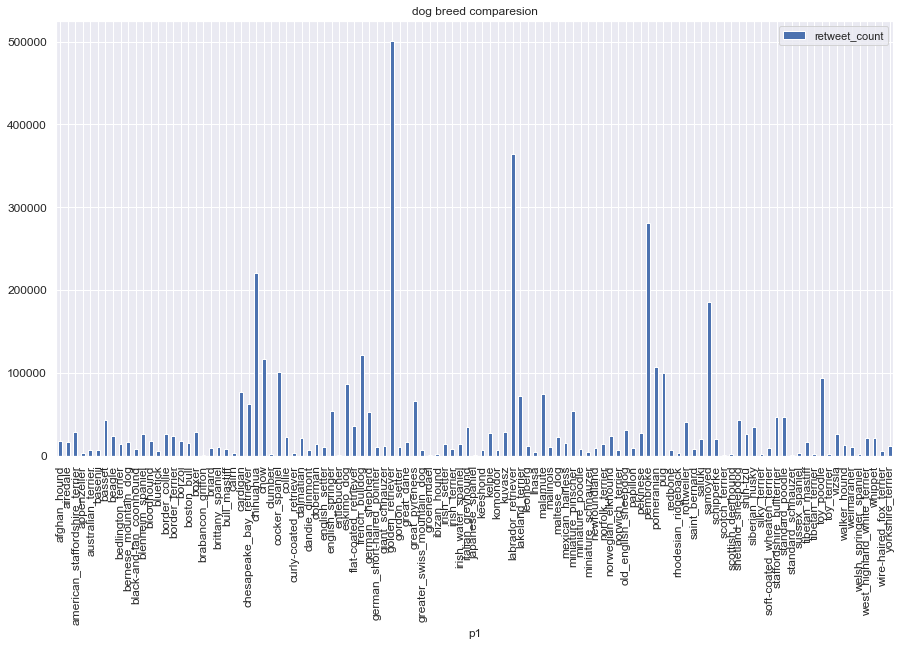

In [147]:
#4 - (p1) compare between the kinds of dogs by retweet and favorite
final_df_dogs_only.groupby(['p1']).retweet_count.sum().plot(kind='bar', title ="dog breed comparesion", figsize=(15, 8), legend=True, fontsize=12)


In [148]:
retweet_sum =final_df_dogs_only.groupby(['p1']).retweet_count.sum().sort_values()
retweet_sum

p1
groenendael                          413
japanese_spaniel                     471
entlebucher                          706
brabancon_griffon                    863
standard_schnauzer                   928
scotch_terrier                      1250
ibizan_hound                        1293
welsh_springer_spaniel              1551
clumber                             1885
silky_terrier                       1891
tibetan_terrier                     2231
scottish_deerhound                  2293
toy_terrier                         2324
sussex_spaniel                      2478
appenzeller                         2916
rhodesian_ridgeback                 3076
cairn                               3391
curly-coated_retriever              3625
lhasa                               4130
miniature_schnauzer                 4361
wire-haired_fox_terrier             5847
bluetick                            6017
australian_terrier                  6157
dandie_dinmont                      6242
komondor     

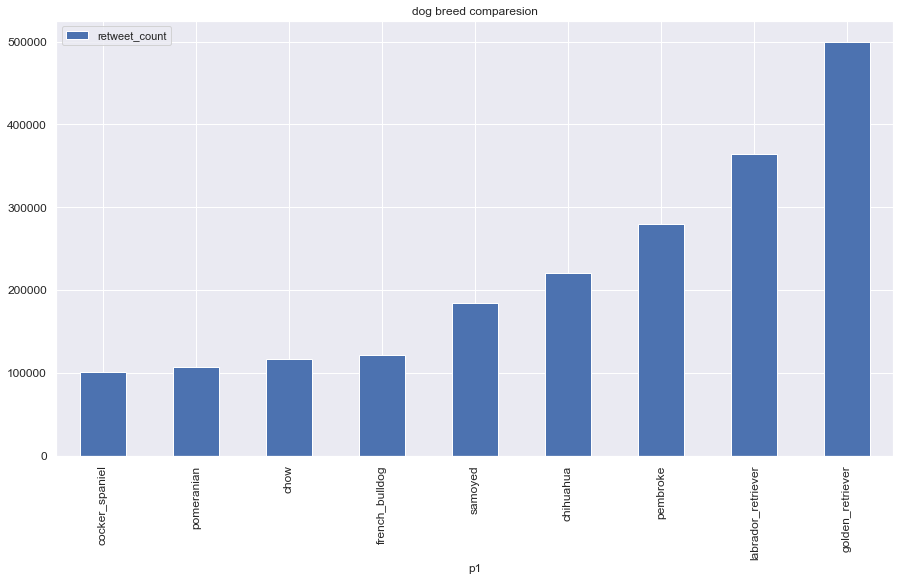

In [149]:
#top 10 kinds of dogs have collected retweet
retweet_sum[retweet_sum > 99182].plot(kind='bar', title ="dog breed comparesion", figsize=(15, 8), legend=True, fontsize=12)

In [150]:
favorite_sum =final_df_dogs_only.groupby(['p1']).favorite_count.sum().sort_values()

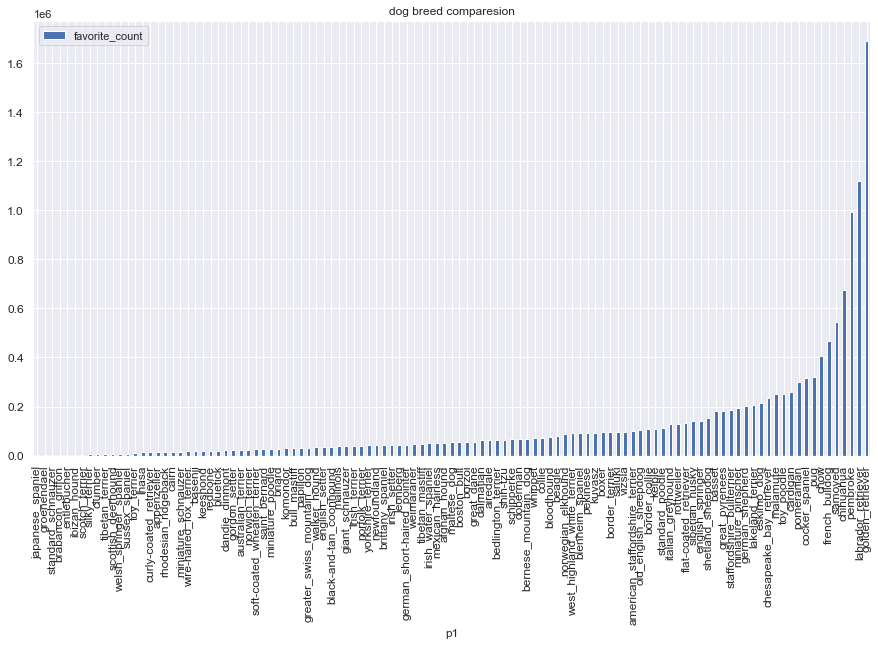

In [151]:
favorite_sum.plot(kind='bar', title ="dog breed comparesion", figsize=(15, 8), legend=True, fontsize=12)

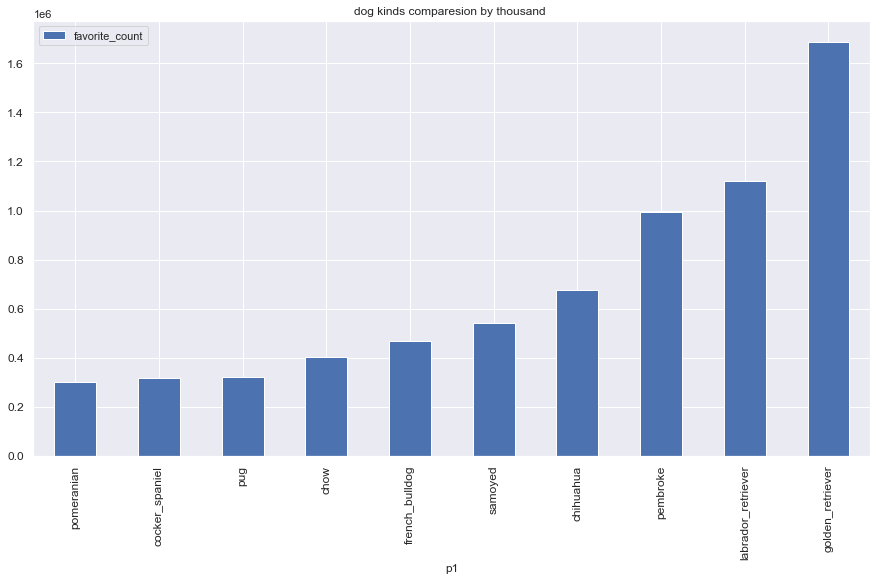

In [152]:
#top 10 kinds of dogs have collected favorites
favorite_sum[favorite_sum > 260287].plot(kind='bar', title ="dog kinds comparesion by thousand ", figsize=(15, 8), legend=True, fontsize=12)